In [ ]:
# # Optionally if using AMD/Intel GPU with PlaidML
# import os
# os.environ['KERAS_BACKEND']='plaidml.keras.backend'

In [3]:
from keras.models import load_model
import numpy as np
import cv2
from matplotlib import pyplot as plt
%matplotlib inline
cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
model = load_model('../CNNPredictions/CNN-final-model.h5')

#### Working with an image

In [5]:
img = cv2.imread('group.jpg')

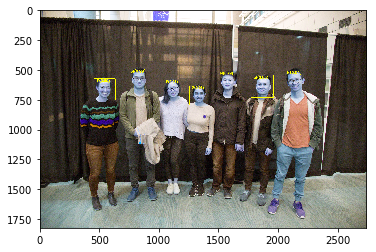

True

In [6]:
font = cv2.FONT_HERSHEY_COMPLEX
crop_margin = 0.2

height, width, _ = img.shape
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = cascade.detectMultiScale(gray_img, scaleFactor=1.3, minNeighbors=5)
person_num = 0
for (x,y,w,h) in faces:
    person_num += 1
    
    x1 = int(x - crop_margin * w)
    y1 = int(y - crop_margin * h)
    x2 = int(x + (1 + crop_margin) * w)
    y2 = int(y + (1 + crop_margin) * h)
    
    if x1 < 0:
        x1 = 0
    if y1 < 0:
        y1 = 0
    if x2 > width:
        x2 = width
    if y2 > height:
        y2 = height

    
    crop_img = gray_img[y1:y2, x1:x2]
    try: 
#         print(f'Processing face #{person_num}: ({x1},{y1}),({x2},{y2})')
        resized_normalized = cv2.resize(crop_img, (100, 100))/255
        cv2.rectangle(img, (x1,y1), (x2, y2), (255,255,0), 2)
        prediction = model.predict(resized_normalized.reshape(-1,100,100,1))[0][0]
    
        if (prediction >= 0.5):
            text = f'M({prediction:.2f})'
        else:
            text = f'F({prediction:.2f})'
    
        cv2.putText(img, text, (x,y), font, w/140, (255,255,0), 2, cv2.LINE_AA)
    except:
#         print(f'Image({width},{height}) failed to crop face #{person_num}: ({x1},{y1}),({x2},{y2})')
        pass
    
plt.imshow(img)
plt.show()
cv2.imwrite( "output.jpg", img )

#### Working with video feed

In [7]:
cap = cv2.VideoCapture(0)  # Camera device

In [8]:
font = cv2.FONT_HERSHEY_COMPLEX
img = cv2.imread('group.jpg')
crop_margin = 0.2

while True:
    ret, img = cap.read()
    
    height, width, _ = img.shape
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = cascade.detectMultiScale(gray_img, scaleFactor=1.3, minNeighbors=5)
    person_num = 0
    for (x,y,w,h) in faces:
        person_num += 1

        x1 = int(x - crop_margin * w)
        y1 = int(y - crop_margin * h)
        x2 = int(x + (1 + crop_margin) * w)
        y2 = int(y + (1 + crop_margin) * h)

        if x1 < 0:
            x1 = 0
        if y1 < 0:
            y1 = 0
        if x2 > width:
            x2 = width
        if y2 > height:
            y2 = height


        crop_img = gray_img[y1:y2, x1:x2]
        try: 
    #         print(f'Processing face #{person_num}: ({x1},{y1}),({x2},{y2})')
            resized_normalized = cv2.resize(crop_img, (100, 100))/255
            cv2.rectangle(img, (x1,y1), (x2, y2), (255,255,0), 2)
            prediction = model.predict(resized_normalized.reshape(-1,100,100,1))[0][0]

            if (prediction >= 0.5):
                text = f'M({prediction:.2f})'
            else:
                text = f'F({prediction:.2f})'

            cv2.putText(img, text, (x,y), font, w/140, (255,255,0), 2, cv2.LINE_AA)
        except:
    #         print(f'Image({width},{height}) failed to crop face #{person_num}: ({x1},{y1}),({x2},{y2})')
            pass
    
    cv2.imshow('img', img)
    k = cv2.waitKey(30) & 0xff
    if k == 27:
        break

cap.release()
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

Notes: There seems to be a bug with OpenCV running in Jupyter Notebook, cv2.imshow() causes the program to hang. The last line 'cv2.waitKey(1)' somehow bypasses it and allows the cv2.imshow() to work. Even so, you still need to restart the kernel after stopping the run.

In [9]:
# reboot kernel
import IPython
app = IPython.Application.instance()
app.kernel.do_shutdown(True)

{'status': 'ok', 'restart': True}